# Load the data

In [1]:
# Import modules
import sklearn
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib
matplotlib.rcParams.update({'font.size': 22})
plt = matplotlib.pyplot
from mlxtend.plotting import plot_decision_regions

In [2]:
# Load the dataset
X, y = sklearn.datasets.make_moons(n_samples=100, noise = 0.15)

print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
print(X)
print(y)

In [ ]:
plt.scatter(X[y == 0, 0], X[y == 0, 1],
            c='r', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1],
            c='b', marker='s')

plt.xlim(X[:, 0].min()-1, X[:, 0].max()+1)
plt.ylim(X[:, 1].min()-1, X[:, 1].max()+1)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Prepare data (training and testing sets)
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=1) # random state for repeatability

print(Xtrain, type(Xtrain))
print(ytrain, type(ytrain))

# Function for visualizing the errors

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

def show_errors(model, parameter, start_value, end_value, Xtrain, ytrain, Xtest, ytest):
  total_train_error = 0
  total_test_error = 0
  start_nb = start_value
  end_nb = end_value
  all_train_errors = np.array([float(i) for i in range(1, (end_nb-start_nb+1))])
  all_test_errors = np.array([float(i) for i in range(1, (end_nb-start_nb+1))])
  x = np.array([i for i in range(start_nb, end_nb)])
  for nb in range(start_nb, end_nb):
    current_model = model
    current_model.set_params(**{parameter: nb})
    current_model.fit(Xtrain, ytrain)

    train_error = 1-accuracy_score(ytrain, current_model.predict(Xtrain))
    total_train_error += train_error
    all_train_errors[nb - start_nb] = train_error

    test_error = 1-accuracy_score(ytest, current_model.predict(Xtest))
    total_test_error += test_error
    all_test_errors[nb - start_nb] = test_error

  print('The average train error is: %s.' % (total_train_error / (end_nb-start_nb)))
  print('The average test error is: %s.' % (total_test_error / (end_nb-start_nb)))
  plt.plot(x, all_train_errors, 'r')
  plt.plot(x, all_test_errors, 'b')
  plt.legend(['training error', 'test error'])
  plt.xlabel('value metaparameter')
  plt.ylabel('error')
  plt.show()
  print('The optimal metaparameter is %s for a test error of %s.' %(str(np.argmin(all_test_errors)+start_nb), str(np.min(all_test_errors))))

# Naive Bayes

In [ ]:
# Import the model
from sklearn.naive_bayes import GaussianNB

# Create an instance of the model
model_NB = GaussianNB(var_smoothing= 1e-4)

# Train the model
model_NB.fit(Xtrain, ytrain)

# Predict test set
ypredict_NB = model_NB.predict(Xtest)

print(ypredict_NB, type(ypredict_NB))

[0 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0] <class 'numpy.ndarray'>


In [ ]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_NB))

0.8181818181818182


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


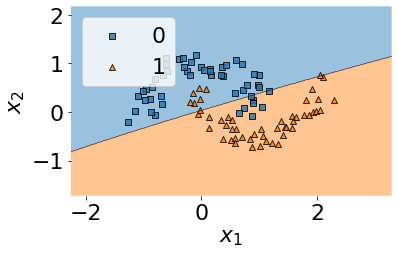

In [ ]:
plot_decision_regions(X, y,
                      clf=model_NB, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate the results
from sklearn.metrics import confusion_matrix
cm_NB = pd.DataFrame(confusion_matrix(ytest, ypredict_NB, labels=labels)
              )

# i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
print(confusion_matrix(ytest, ypredict_NB, labels=labels))
print(cm_NB)

# KNN

In [7]:
# Import the model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the model
model_KNN = KNeighborsClassifier(n_neighbors=3, weights= "distance", algorithm= "kd_tree", leaf_size = 1)

# Train the model
model_KNN.fit(Xtrain, ytrain)

# Predict test set
ypredict_KNN = model_KNN.predict(Xtest)

print(ypredict_KNN, type(ypredict_KNN))

[0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 0 0 1] <class 'numpy.ndarray'>


The average train error is: 0.1497201492537313.
The average test error is: 0.18181818181818182.


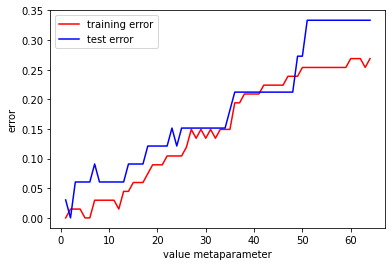

The optimal metaparameter is 2 for a test error of 0.0.


In [8]:
show_errors(model = KNeighborsClassifier(), parameter = "n_neighbors", start_value = 1, end_value = 65, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

In [9]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_KNN))

0.9393939393939394


In [ ]:
plot_decision_regions(X, y,
                      clf=model_KNN, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
# Investigate the results
from sklearn.metrics import confusion_matrix
labels = dfIris["target"].cat.categories
cm_KNN = pd.DataFrame(confusion_matrix(ytest, ypredict_KNN, labels=labels),
              columns = labels,
              index = labels
              )

# i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
print(confusion_matrix(ytest, ypredict_KNN, labels=labels))
print(cm_KNN)

NameError: ignored

In [12]:
# One label at a time
# What is the percentage of true positive for a given category?
def precisionRate(confMatrix, label):
    return confMatrix.loc[label, label]/confMatrix.loc[label].sum()

print(precisionRate(cm_KNN, "virginica")) # 13/14

# What is the percentage of true negative for a given category?
def specificityRate(confMatrix, label):
    return confMatrix.drop(index=label, columns=label).values.sum()/confMatrix.drop(columns=label).values.sum()

print(specificityRate(cm_KNN, "virginica")) # 36/37

NameError: ignored

# Decision tree

In [13]:
# Import the model
from sklearn.tree import DecisionTreeClassifier

# Create an instance of the model
model_tree = DecisionTreeClassifier(criterion= "gini", splitter= "best", min_samples_split= 2, max_depth= 5, max_leaf_nodes= 7)

# Train the model
model_tree.fit(Xtrain, ytrain)

# Predict test set
ypredict_tree = model_tree.predict(Xtest)

The average train error is: 0.20484313128236376.
The average test error is: 0.30426716141001875.


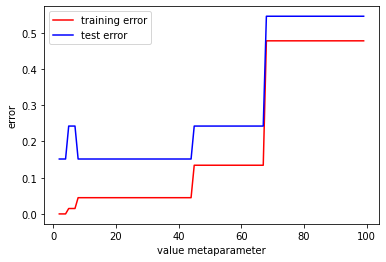

The optimal metaparameter is 2 for a test error of 0.1515151515151515.


In [14]:
show_errors(model = DecisionTreeClassifier(), parameter = "min_samples_split", start_value = 2, end_value = 100, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

The average train error is: 0.002893694791349377.
The average test error is: 0.15337043908472509.


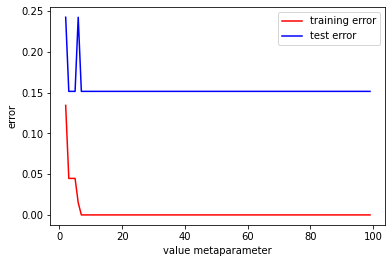

The optimal metaparameter is 3 for a test error of 0.1515151515151515.


In [15]:
show_errors(model = DecisionTreeClassifier(), parameter = "max_leaf_nodes", start_value =2, end_value = 100, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

The average train error is: 0.002864465551032717.
The average test error is: 0.15335169880624455.


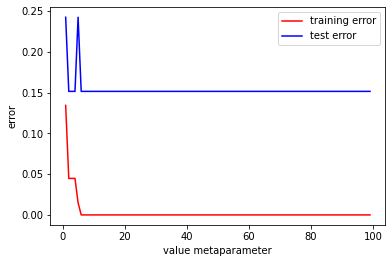

The optimal metaparameter is 2 for a test error of 0.1515151515151515.


In [16]:
show_errors(model = DecisionTreeClassifier(), parameter = "max_depth", start_value = 1, end_value = 100, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

In [17]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_tree))

0.7575757575757576


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


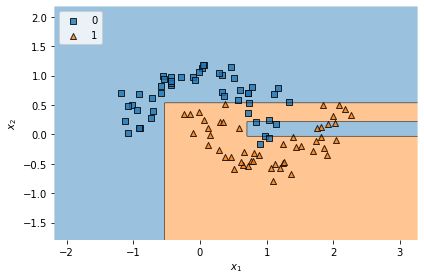

In [18]:
plot_decision_regions(X, y,
                      clf=model_tree, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate the results
from sklearn.metrics import confusion_matrix
labels = dfIris["target"].cat.categories
cm_tree = pd.DataFrame(confusion_matrix(ytest, ypredict_tree, labels=labels),
              columns = labels,
              index = labels
              )

print(cm_tree)

In [ ]:
# Visualize the tree in a file
from sklearn import tree
import pydot
tree.export_graphviz(model_tree, out_file='/content/tree.dot')  
(graph,) = pydot.graph_from_dot_file("/content/tree.dot")
graph.write_png("/content/tree.png")  

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


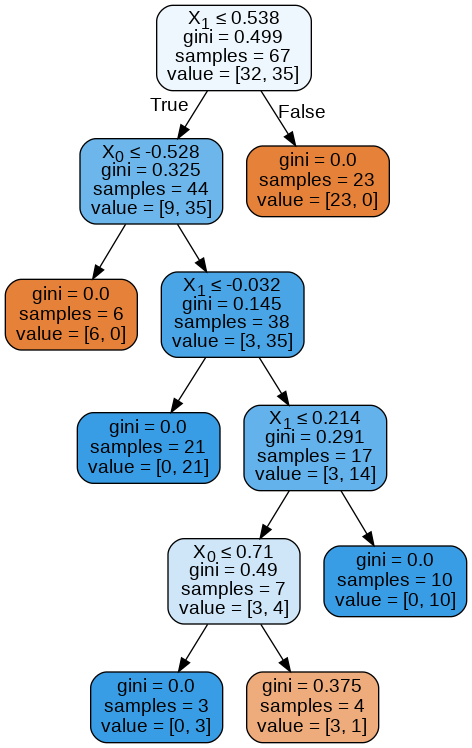

In [19]:
# Visualize the tree in python
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn import tree
import pydot
dot_data = StringIO()
export_graphviz(model_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random forest

In [ ]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the model
model_forest = RandomForestClassifier(n_estimators = 100, random_state = 3) # random state for repeatability

# Train the model
model_forest.fit(Xtrain, ytrain)

# Predict test set
ypredict_forest = model_forest.predict(Xtest)
print(model_forest.feature_importances_)

[0.42385562 0.57614438]


The average train error is: 0.0005994125756758385.
The average test error is: 0.12693197030546438.


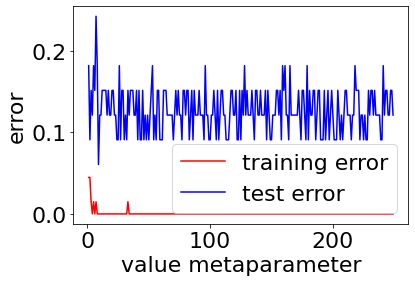

The optimal metaparameter is 9 for a test error of 0.06060606060606055.


In [ ]:
show_errors(model = RandomForestClassifier(), parameter = "n_estimators", start_value = 1, end_value = 250, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

In [ ]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_forest))

0.9090909090909091


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


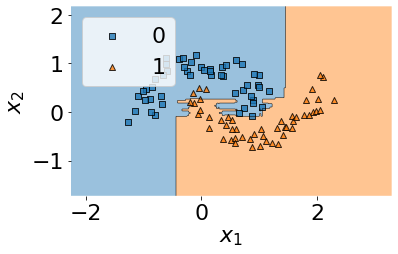

In [ ]:
plot_decision_regions(X, y,
                      clf=model_forest, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate the results
from sklearn.metrics import confusion_matrix

cm_forest = pd.DataFrame(confusion_matrix(ytest, ypredict_forest, labels=labels),
              columns = labels,
              index = labels
              )

# i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
print(confusion_matrix(ytest, ypredict_forest, labels=labels))
print(cm_forest)

In [ ]:
# One label at a time
# What is the percentage of true positive for a given category?
def precisionRate(confMatrix, label):
    return confMatrix.loc[label, label]/confMatrix.loc[label].sum()

print(precisionRate(cm_forest, "virginica")) 

# What is the percentage of true negative for a given category?
def specificityRate(confMatrix, label):
    return confMatrix.drop(index=label, columns=label).values.sum()/confMatrix.drop(columns=label).values.sum()

print(specificityRate(cm_forest, "virginica")) 

# SVM

In [ ]:
# Import the model
from sklearn.svm import SVC

# Create an instance of the model
model_SVM = SVC(kernel='rbf', C = 3)

# Train the model
model_SVM.fit(Xtrain, ytrain)

# Predict test set
ypredict_SVM = model_SVM.predict(Xtest)

The average train error is: 0.0015710919088766679.
The average test error is: 0.06539074960127589.


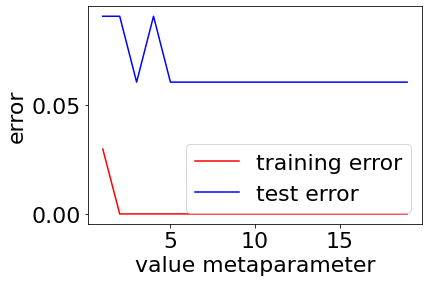

The optimal metaparameter is 3 for a test error of 0.06060606060606055.


In [ ]:
show_errors(model = SVC(), parameter = "C", start_value = 1, end_value = 20, Xtrain = Xtrain, ytrain = ytrain, Xtest = Xtest, ytest = ytest)

In [ ]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_SVM))

0.9393939393939394


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


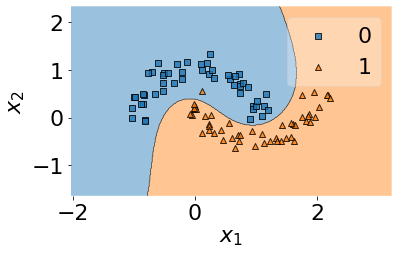

In [ ]:
plot_decision_regions(X, y,
                      clf=model_SVM, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate the results
from sklearn.metrics import confusion_matrix
labels = dfIris["target"].cat.categories
cm_SVM = pd.DataFrame(confusion_matrix(ytest, ypredict_SVM, labels=labels),
              columns = labels,
              index = labels
              )

# i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
print(confusion_matrix(ytest, ypredict_SVM, labels=labels))
print(cm_SVM)

In [ ]:
# One label at a time
# What is the percentage of true positive for a given category?
def precisionRate(confMatrix, label):
    return confMatrix.loc[label, label]/confMatrix.loc[label].sum()

print(precisionRate(cm_SVM, "virginica")) 

# What is the percentage of true negative for a given category?
def specificityRate(confMatrix, label):
    return confMatrix.drop(index=label, columns=label).values.sum()/confMatrix.drop(columns=label).values.sum()

print(specificityRate(cm_SVM, "virginica")) 

# Neural network

In [ ]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Create an instance of the model
model_NN = MLPClassifier(hidden_layer_sizes=(20,20,20, 20), solver='lbfgs')

# Train the model
model_NN.fit(Xtrain, ytrain)

# Predict test set
ypredict_NN = model_NN.predict(Xtest)

In [ ]:
# Evaluate performances of model in terms of accuracy
from sklearn.metrics import accuracy_score

print(accuracy_score(ytest, ypredict_NN))

1.0


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


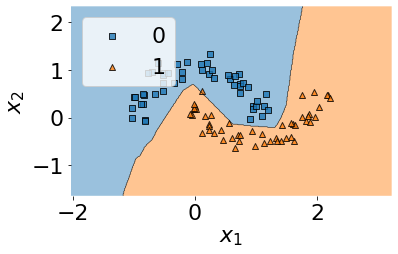

In [ ]:
plot_decision_regions(X, y,
                      clf=model_NN, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [ ]:
# Investigate the results
from sklearn.metrics import confusion_matrix
labels = y.cat.categories
cm_NN = pd.DataFrame(confusion_matrix(ytest, ypredict_NN, labels=labels),
              columns = labels,
              index = labels
              )

# i-th row and j-th column entry indicates the number of samples with true 
# label being i-th class and prediced label being j-th class.
print(confusion_matrix(ytest, ypredict_NN, labels=labels))
print(cm_NN)

In [ ]:
# One label at a time
# What is the percentage of true positive for a given category?
def precisionRate(confMatrix, label):
    return confMatrix.loc[label, label]/confMatrix.loc[label].sum()

print(precisionRate(cm_NN, "virginica")) 

# What is the percentage of true negative for a given category?
def specificityRate(confMatrix, label):
    return confMatrix.drop(index=label, columns=label).values.sum()/confMatrix.drop(columns=label).values.sum()

print(specificityRate(cm_NN, "virginica")) 

# Model optimization

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [ ]:
# K-fold
model_tree = DecisionTreeClassifier(random_state = 2)
scores = list()
kf = KFold(n_splits=3, shuffle=True)
labels = dfIris["target"].cat.categories
for train_index, test_index in kf.split(X):
  X_train, X_test = X.values[train_index], X.values[test_index]
  y_train, y_test = y.values[train_index], y.values[test_index]
  model_tree.fit(X_train, y_train)
  scores.append(model_tree.score(X_test, y_test))
  pred = model_tree.predict(X_test)

print('The tree model gives a testing score of '+str(np.mean(scores))+' and a variance of '+str(np.std(scores)))

In [ ]:
# Grid search
# Train the model
parameters_SVM = {"kernel": ("linear", "poly", "rbf", "sigmoid")}
model_SVM = SVC(random_state= 2)
best_model = GridSearchCV(model_SVM, parameters_SVM, cv=5)
best_model.fit(Xtrain, ytrain)
print(best_model.best_params_)  
print("The best parameters for the tree model give the following validation score: " + str(best_model.best_score_))

# Test the model
print(accuracy_score(ytest, best_model.predict(Xtest)))

{'kernel': 'rbf'}
The best parameters for the tree model give the following validation score: 0.9252747252747252
0.9090909090909091


/usr/local/lib/python3.6/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


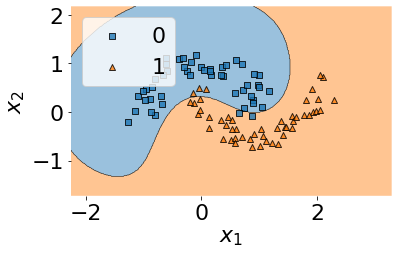

In [ ]:
plot_decision_regions(X, y,
                      clf=model_SVM, 
                      )
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()